In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

### Load data: model predictions and true values

In [2]:
pct_shuffled = pd.read_csv("../../../../../data/ddg_synthetic/FoldX_ddG/noise_robustness/shuffling/pct_shuffled.csv")
pct_shuffled = dict(zip(pct_shuffled["pct_shuffled"].to_list(),pct_shuffled["effective_pct_shuffled_avg"].to_list()))
pct_shuffled[0] = 0

In [3]:
def calc_metrics(shuffling_pct):

    df = pd.read_csv(f"model_predictions/Graphinity_predictions_test-noise_robustness-shuffling-{shuffling_pct}pct.csv")
            
    # pearson correlation
    pc = pearsonr(df["true_label"],df["pred_score"])[0]
    
    # distribution comparison - ratio of st devs
    sdr = df["pred_score"].std()/df["true_label"].std()
    if sdr > 1: sdr = df["true_label"].std()/df["pred_score"].std()

    return pc, sdr

In [4]:
metrics = []
for shuffling_pct in np.arange(0,110,10):
    pcs, sdr = calc_metrics(shuffling_pct)
    metrics.append([pct_shuffled[shuffling_pct], pcs, sdr])

In [5]:
metrics_df = pd.DataFrame(metrics, columns=["Effective Percent Shuffled","Test Pearson's Correlation", "Standard Deviation Ratio"])

### Plot

##### Figure 4b middle

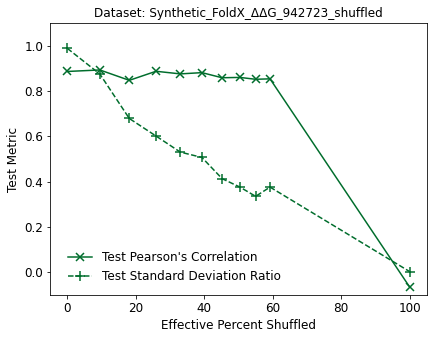

In [6]:
fig,ax = plt.subplots(figsize=(6.75,5))

ax.plot(metrics_df["Effective Percent Shuffled"],metrics_df["Test Pearson's Correlation"],
        marker="x", markersize=8, markeredgewidth=1.5, color="#006d2c", linestyle="-",
        label="Test Pearson's Correlation")
ax.plot(metrics_df["Effective Percent Shuffled"],metrics_df["Standard Deviation Ratio"],
         marker="+", markersize=10, markeredgewidth=1.5, color="#006d2c", linestyle="--",
         label="Test Standard Deviation Ratio")

ax.set_ylabel("Test Metric", fontsize=12)
ax.set_xlabel("Effective Percent Shuffled", fontsize=12)
ax.set_ylim(-0.1,1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(frameon=False, bbox_to_anchor=(0.64,0.2), fontsize=12)

plt.title("Dataset: Synthetic_FoldX_ΔΔG_942723_shuffled")

plt.savefig("Figure-4b-middle.png", dpi=300)

#### Figure 4b - left and right

In [7]:
def load_and_plot(left_right):
    
    if left_right == "left": shuffling_pct = 10
    elif left_right == "right": shuffling_pct = 90
    
    df = pd.read_csv(f"model_predictions/Graphinity_predictions_test-noise_robustness-shuffling-{shuffling_pct}pct.csv")
    
    # plot upper – scatter

    plt.scatter(df["true_label"],df["pred_score"],marker="x",color="k") # label = true, score = pred
    plt.xlabel("True FoldX $\Delta\Delta$G (kcal/mol)")
    plt.ylabel("Predicted $\Delta\Delta$G (kcal/mol)")
    # y=x line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, "k--", label="$y = x$")
    # trendline
    z = np.polyfit(df["true_label"],df["pred_score"],1)
    p = np.poly1d(z)
    plt.plot(df["true_label"],p(df["true_label"]), linestyle="-", color="#006d2c", label="Trendline", linewidth=2)
    # Pearson correlation on plot
    if left_right == "left":
        plt.text(-66.5, 0,f"r = {pearsonr(df['true_label'],df['pred_score'])[0]:.2f}", ha="center", va="center")
    elif left_right == "right":
        plt.text(-67, -2,f"r = {pearsonr(df['true_label'],df['pred_score'])[0]:.2f}", ha="center", va="center")
    plt.tight_layout()
    plt.legend()
    plt.axis("square")

    ax = plt.gca()

    ax.set_xticks(np.arange(-60,40,20))
    ax.set_yticks(np.arange(-60,40,20))
    
    plt.savefig(f"Figure-4b-upper_{left_right}", dpi=300)
    plt.show()
    plt.clf()

    # plot lower – histogram
    
    sns.histplot(df["true_label"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
                 kde_kws={"bw_adjust":1.5}, color="k", label="True")
    sns.histplot(df["pred_score"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
                 kde_kws={"bw_adjust":1.5}, color="#006d2c", label="Predicted")

    if left_right == "left":
        plt.text(x=-7.75, y=17500, s=f"Standard Deviation Ratio = {round(df['pred_score'].std()/df['true_label'].std(), 2)}")
    elif left_right == "right":
        plt.text(x=-7.75, y=39000, s=f"Standard Deviation Ratio = {round(df['pred_score'].std()/df['true_label'].std(), 2)}")

    plt.xlim(-8,5)
    plt.xlabel("FoldX $\Delta\Delta$G (kcal/mol)")
    plt.ylabel("Count")
    plt.legend(frameon=False)

    plt.tight_layout()

    plt.savefig(f"Figure-4b-lower_{left_right}", dpi=300)
    plt.show()

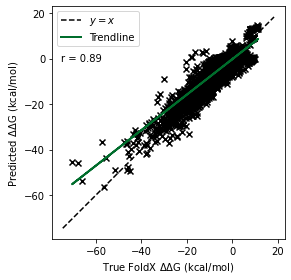

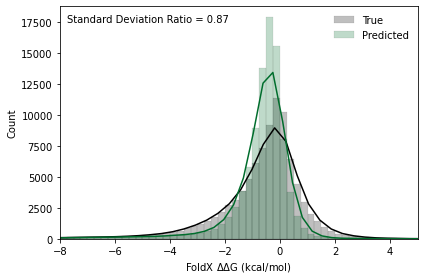

In [8]:
load_and_plot("left")

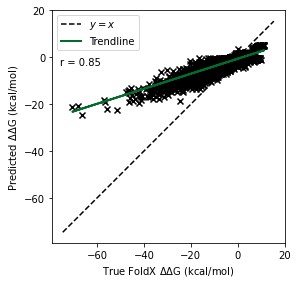

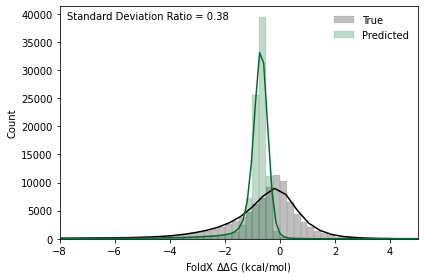

In [9]:
load_and_plot("right")